In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 交互作用(interaction feature)
線形モデルに交互作用特徴量を加える

In [13]:
from mglearn.datasets import make_wave
from sklearn.preprocessing import OneHotEncoder
X, y = make_wave(n_samples=100)
print('X data : {}'.format(X[:5]))

bins = np.linspace(-3,3,11)
print('bins : {}'.format(bins))
which_bin = np.digitize(X, bins=bins)
print('bin member ship for data points : \n{}'.format(which_bin[:5]))

encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)

print('One-hot-encording transformed...\n{}'.format(X_binned[:5]))

X data : [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
bins : [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]
bin member ship for data points : 
[[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]
One-hot-encording transformed...
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [14]:
#One hot encordingしたデータを元のデータと組み合わせる(横方向)
X_combined = np.hstack([X, X_binned])
X_combined[:5]

array([[-0.75275929,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 2.70428584,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 1.39196365,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 0.59195091,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-2.06388816,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

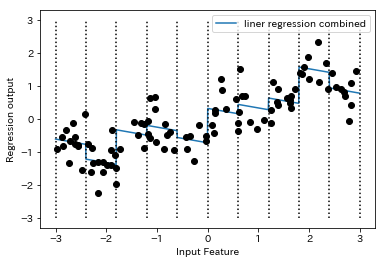

In [24]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression().fit(X_combined, y)

line = np.linspace(-3,3,1000, endpoint=False).reshape(-1,1)

line_binned = encoder.transform(np.digitize(line, bins=bins))
line_combined = np.hstack([line, line_binned])
#予測図を書く
plt.plot(line, reg.predict(line_combined), label='liner regression combined')

for bin in bins:
    #点線を書く
    plt.plot([bin,bin],[-3,3], ':', c='k')
    
plt.legend(loc='best')
plt.ylabel('Regression output')
plt.xlabel('Input Feature')
plt.plot(X[:,0], y , 'o', c='k')

この例では、モデルは個々のビンに対して、オフセットと傾きを学習する。しかし傾きは下向きですべてのビンで共有されている。x軸は一つしかなく、したがって傾きが一つしか存在しないからだ。傾きがすべてのビンで共有されているのであまり役に立たない。実際はそれぞれのビンごとに傾きがあればよい。これを実現するにはデータポイントがどこに入っているか示す特徴量とｘ軸のどこにあるかを示す特徴量の交互作用のもしくは積を加えれば良い。

In [29]:
X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape)
display(X_product[:1])

(100, 20)


array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.        , -0.        , -0.        , -0.75275929, -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.        ]])

どのビンにデータが入っているか示すビン番号と、もとの特徴量とビン番号の積になっている

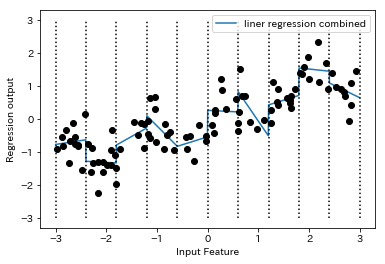

In [33]:
reg = LinearRegression().fit(X_product, y)

line_product= np.hstack([line_binned, line*line_binned])
#予測図を書く
plt.plot(line, reg.predict(line_product), label='liner regression combined')

for bin in bins:
    #点線を書く
    plt.plot([bin,bin],[-3,3], ':', c='k')
    
plt.legend(loc='best')
plt.ylabel('Regression output')
plt.xlabel('Input Feature')
plt.plot(X[:,0], y , 'o', c='k')

図からわかるように、ここのビンがそれれのオフセットと傾きを持つようになっている。  
線形モデルを改良する方法にもとの特徴量の多項式を追加する方法もある
# 多項式特徴量

In [37]:
from sklearn.preprocessing import PolynomialFeatures
# x**10までの多項式を加える(include_biasだと常に1をとる特徴量を加える)
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
print(X_poly.shape)

(100, 10)


In [38]:
print('Entries of X:\n{}'.format(X[:5]))
print('Entries of X_poly:\n{}'.format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [39]:
#個々の特徴量の意味は次のメソッドで取得できる
print('Polynominal feature names: {}'.format(poly.get_feature_names()))

Polynominal feature names: ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


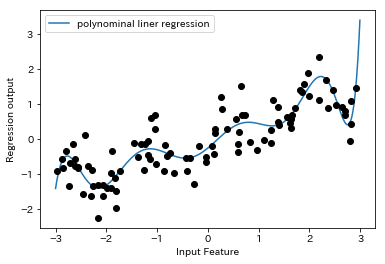

In [46]:
reg = LinearRegression().fit(X_poly, y)

line_ploy = poly.transform(line)
plt.plot(line, reg.predict(line_ploy), label='polynominal liner regression')
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input Feature')
plt.legend(loc='best')

高次の多項式特徴量は、境界付近やデータの少ない領域で極端な振る舞いをする傾向にある。  
比較として、カーネル法を用いたSVMモデルを変換していないデータに適用してみる

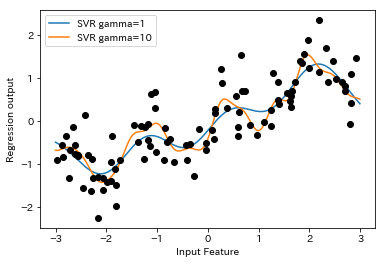

In [50]:
from sklearn.svm import SVR
for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input Feature')
plt.legend(loc='best')

SVMでは特徴量に明示的な変換を入れなくても、多項回帰式と同じような複雑な予測を行うことができている  
より現実てきなデータでどのようにこの特徴量が構築されているか、どのくらいモデルに貢献しているか検証する。

In [53]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

#データのスケール変換
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [55]:
#2次までの多項特徴量と交互作用特徴量を抽出する

poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly  = poly.transform(X_test_scaled)
print('X_train shape: {}'.format(X_train.shape))
print('X_train_poly shape : {}'.format(X_train_poly.shape))
print('X_test_poly shape : {}'.format(X_test_poly.shape))

X_train shape: (379, 13)
X_train_poly shape : (379, 105)
X_test_poly shape : (127, 105)


もともと13しかなかった特徴量が105に増えている。これらは元の特徴量2つの積の組合せと2次までの多項式の(2乗)の特徴量の数である

In [57]:
print('Polynominal feature names: {}'.format(poly.get_feature_names()))

Polynominal feature names: ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


Rige回帰を使って多項式特徴量を考慮する場合としない場合で検証する

In [66]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print('Score without interaction: {:,.3f}'.format(ridge.score(X_train_scaled, y_train)))

ridge = Ridge().fit(X_train_poly, y_train)
print('Score with interaction: {:,.3f}'.format(ridge.score(X_train_poly, y_train)))

Score without interaction: 0.766
Score with interaction: 0.887


交互作用特徴量と多項式特徴量は確実にRidge回帰の性能を押し上げている

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print('Score without interaction: {:,.3f}'.format(rf.score(X_train_scaled, y_train)))

rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print('Score with interaction: {:,.3f}'.format(ridge.score(X_train_poly, y_train)))

Score without interaction: 0.983
Score with interaction: 0.887


追加の特徴量がなくてもランダムフォレストはRidge回帰の性能を上回った。むしろ性能が悪い。

In [68]:
rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
print('Score without interaction: {:,.3f}'.format(rf.score(X_train, y_train)))

Score without interaction: 0.985
